In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("D:\jupyter notebook projects\Data\gender_classification_v7.csv")

In [4]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [6]:
df['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

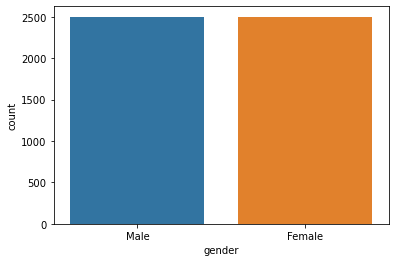

In [7]:
sns.countplot(data=df,x='gender')

In [8]:
df.sample()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
2744,1,12.7,5.9,0,0,1,0,Female


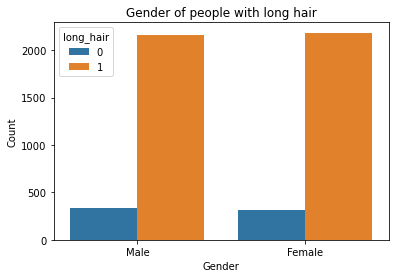

In [9]:
sns.countplot(data=df,x='gender',hue='long_hair')
plt.title("Gender of people with long hair")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [10]:
df['forehead_width_cm'].value_counts()

12.0    168
11.8    161
14.1    155
14.0    154
11.5    154
11.6    152
11.9    150
13.3    149
14.2    149
12.2    145
12.6    145
12.1    145
13.2    143
14.3    143
12.9    141
12.5    141
13.7    140
12.8    138
12.3    138
13.6    138
13.0    137
13.4    137
13.5    136
13.8    134
11.7    133
13.1    131
13.9    131
12.7    130
12.4    127
11.4     84
14.9     79
14.5     72
15.2     71
15.5     66
15.1     65
15.4     64
15.3     64
14.4     63
14.6     61
15.0     60
14.7     59
14.8     48
Name: forehead_width_cm, dtype: int64

In [11]:
df.groupby('gender')['forehead_width_cm'].mean()

gender
Female    12.811675
Male      13.551440
Name: forehead_width_cm, dtype: float64

In [12]:
df.groupby('gender')['forehead_height_cm'].mean()

gender
Female    5.796321
Male      6.096360
Name: forehead_height_cm, dtype: float64

In [13]:
#3sns.scatterplot(data=df,x='forehead_height_cm'y=('gender'.replace({'gender' : { 'Male' : 0, 'Female' : 1}}))

In [14]:
df['nose_wide'].value_counts()

0    2531
1    2470
Name: nose_wide, dtype: int64

<AxesSubplot:xlabel='nose_wide', ylabel='count'>

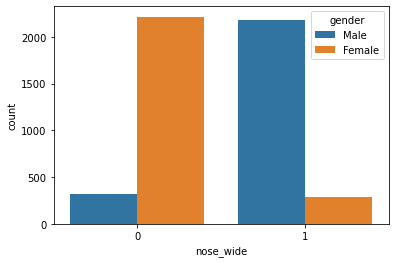

In [15]:
sns.countplot(data=df,x='nose_wide',hue='gender')

## split data train and test

In [16]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=1011)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3750, 7)
(1251, 7)
(3750,)
(1251,)


## logistic reg model

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

#### predict new values and test model accuracy

In [21]:
y_predic=lg.predict(x_test)

In [22]:
##print(np.concatenate(np.reshape(len(y_train),1),np.reshape(len(y_predic),1),1))

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [24]:
confusion_matrix(y_test,y_predic)

array([[591,  13],
       [ 23, 624]], dtype=int64)

In [25]:
cm=confusion_matrix(y_test,y_predic)

In [26]:
labels = ['male', 'female', ' male', 'female']


<AxesSubplot:>

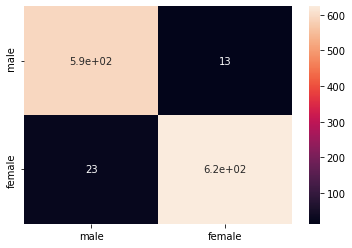

In [27]:
sns.heatmap(cm,xticklabels=labels[:2],yticklabels=labels[2:],annot=True)

it's show that 591 the mdel predict it male and it's realy male ,on another hand predict 624 female and it's female

In [28]:
accuracy_score(y_test,y_predic)

0.9712230215827338

In [29]:
#!pip install mglearn

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [31]:
kn=np.arange(1,20)

In [32]:
acc_test=[]
acc_train=[]

In [33]:
for n_ne in kn:
    knn=KNeighborsClassifier(n_neighbors=n_ne)
    knn.fit(x_train,y_train)
    acc_test.append(knn.score(x_test,y_test))
    acc_train.append(knn.score(x_train,y_train))
    print('accuracy model : ',accuracy_score(y_test,knn.predict(x_test)))
    
    
    

accuracy model :  0.9656274980015987
accuracy model :  0.9656274980015987
accuracy model :  0.964828137490008
accuracy model :  0.9640287769784173
accuracy model :  0.9672262190247801
accuracy model :  0.9680255795363709
accuracy model :  0.9680255795363709
accuracy model :  0.9664268585131894
accuracy model :  0.9704236610711431
accuracy model :  0.9696243005595524
accuracy model :  0.9712230215827338
accuracy model :  0.9704236610711431
accuracy model :  0.9744204636290967
accuracy model :  0.9768185451638689
accuracy model :  0.9760191846522782
accuracy model :  0.9752198241406874
accuracy model :  0.9760191846522782
accuracy model :  0.9760191846522782
accuracy model :  0.9744204636290967


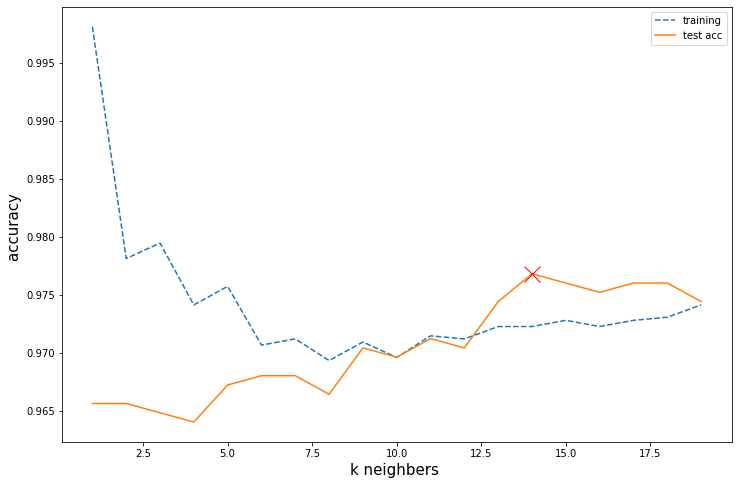

In [34]:
plt.figure(figsize=(12,8))
plt.plot(kn, acc_train, label='training', linestyle='--')
plt.plot(kn, acc_test, label='test acc')

plt.plot(np.argmax(acc_test)+1,acc_test[np.argmax(acc_test)],marker='x',markersize=16,c='red')
plt.xlabel('k neighbers ',fontsize=15)
plt.ylabel('accuracy ',fontsize=15)
plt.legend()  # Display the legend
plt.show()


### svm

In [35]:
from sklearn.svm import SVC

In [81]:
#sv=SVC(C=1,kernel='linear') acc= 96%
sv=SVC(C=1,kernel='rbf') #acc=97%
#sv=SVC(C=1,kernel='poly') # acc=96%

In [82]:
sv.fit(x_train,y_train)

SVC(C=1)

In [83]:
predictor=sv.predict(x_test)

In [84]:
print(sv.score(x_test,y_test)*100)
print(sv.score(x_train,y_train)*100)

97.20223820943245
97.06666666666666


In [85]:
accuracy_score(y_test,predictor)*100

97.20223820943245

In [86]:
confusion_matrix(y_test,predictor)

array([[589,  15],
       [ 20, 627]], dtype=int64)

## naive payes

In [99]:
from sklearn.naive_bayes import BernoulliNB ## beacause data only 2 category male & female

In [100]:
nb=BernoulliNB()

In [101]:
nb.fit(x_train,y_train)

BernoulliNB()

In [102]:
nb_hat=sv.predict(x_test)

In [103]:
print(nb.score(x_test,y_test)*100)
print(nb.score(x_train,y_train)*100)

95.52358113509193
95.97333333333333


In [104]:
accuracy_score(y_test,nb_hat)*100

97.20223820943245